乐学偶得版权所有 lexueoude.com 公众号：乐学Fintech

1.Scatter Plot

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. The relationship between working experience and salary?


In [46]:
experience=[1,2,3,4,5,6,7,8,9,10,2,2,3,3,3,2,4,5,5,2]
salary    =[5000,7000,8000,10000,15000,18000,19000,20000,16000,30000,12000,6000,8000,5500,9000,7800,9200,14000,16000,8000]

list_of_tuples=list(zip(experience,salary))
df=pd.DataFrame(list_of_tuples,columns=['experience','salary'])
df

,experience,salary
0,1,5000
1,2,7000
2,3,8000
3,4,10000
4,5,15000
5,6,18000
6,7,19000
7,8,20000
8,9,16000
9,10,30000


In [47]:
df.describe()

,experience,salary
count,20.000000,20.000000
mean,4.300000,12175.000000
std,2.556725,6308.379974
min,1.000000,5000.000000
25%,2.000000,7950.000000
50%,3.500000,9600.000000
75%,5.250000,16000.000000
max,10.000000,30000.000000


In [48]:
df.corr()

,experience,salary
experience,1.000000,0.906682
salary,0.906682,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

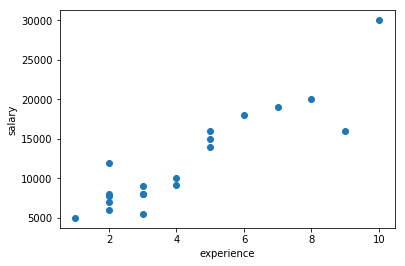

In [49]:
plt.scatter(df.experience,df.salary)
plt.xlabel('experience')
plt.ylabel('salary')
plt.show

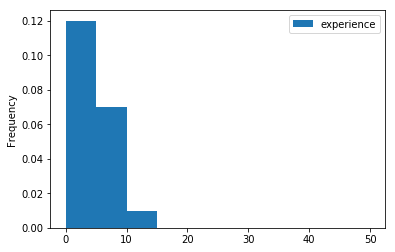

In [50]:
df.plot(kind="hist",y="experience",bins=10 ,range=(0,50),density= True)

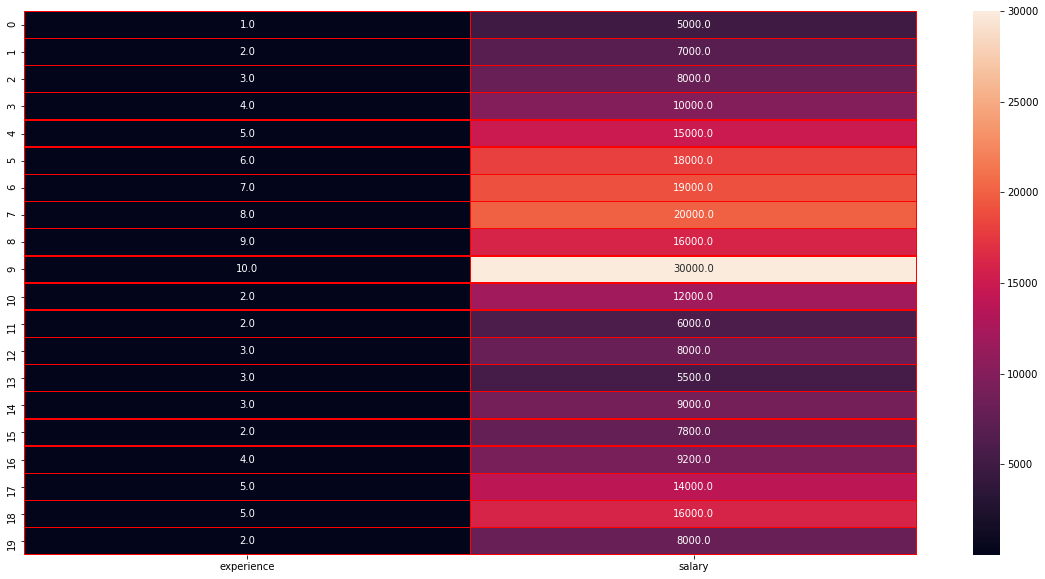

In [51]:
f, ax =plt.subplots(figsize=(20,10))
sns.heatmap(df,annot=True,linewidths=0.5,linecolor="red",fmt=".1f",ax=ax)
plt.show()

1.Covariance:(Linear Association)
$Cov(X,Y)=\sum_{i=1}^{n}(X_i-\overline X)(Y_i- \overline Y)/(n-1)$

2.Because covariance ranges from negetive infinity to positive infinity , we ussually use Correlation instead of Covariance, which ranged form -1 to 1:
$r= \frac {Cov(X,Y)}{S_x S_y}$

3.Variance: $Variance(X,X)= \sum_{i=1}^{n}(X_i-\overline X)(X_i-\overline X)/(n-1)$

In [52]:
# First , Let's calculate the mean!
def calculate_mean(a_list_of_values):
    mean=sum(a_list_of_values)/float(len(a_list_of_values))
    return mean

In [53]:
# Then , Let's calculate the variance!
def calculate_variance(a_list_of_values,mean):
    variance_sum=sum((x-mean)**2 for x in a_list_of_values)
    variance=variance_sum/(len(a_list_of_values)-1)
    return variance

In [54]:
mean_experience=calculate_mean(experience)
print(mean_experience)
variance_experience=calculate_variance(experience,mean_experience)
print(variance_experience)

4.3
6.536842105263156


In [55]:
mean_salary=calculate_mean(salary)
print(mean_salary)
variance_salary=calculate_variance(salary,mean_salary)
print(variance_salary)

12175.0
39795657.89473684


In [56]:
# And then we calculate the Covariance

def calculate_covariance(a_list_of_Xs,the_mean_of_Xs,a_list_of_Ys,the_mean_of_Ys):
    cov_sum=0
    for i in range(len(a_list_of_Xs)):
        cov_sum+=(a_list_of_Xs[i]-the_mean_of_Xs)*(a_list_of_Ys[i]-the_mean_of_Ys)
    the_covariance=cov_sum/(len(a_list_of_Xs)-1)
    return the_covariance

In [57]:
df.cov()

,experience,salary
experience,6.536842,1.462368e+04
salary,14623.684211,3.979566e+07


In [58]:
covariance_of_experience_and_salary=calculate_covariance(experience,mean_experience,salary,mean_salary)
print(covariance_of_experience_and_salary)

14623.684210526315


In [59]:
# Let's calculate standard deviation!

def calculate_the_standard_deviation(a_list_values):
    the_mean_of_the_list_values=sum(a_list_values)/float(len(a_list_values))
    variance=sum([(a_list_values[i]-the_mean_of_the_list_values)**2 for i in range(len(a_list_values)) ]) / float(len(a_list_values)-1)
    return variance**0.5


In [60]:
a=[1,2,3,4,5,6,7,8,9,10]
calculate_the_standard_deviation(a)

3.0276503540974917

In [61]:
import pandas as pd
b=np.array(a)
b.std()

2.8722813232690143

In [62]:
# Let's calculate the correlation!

def calculate_the_correlation(a_list_of_Xs,the_mean_of_Xs,a_list_of_Ys,the_mean_of_Ys):
    X_std=calculate_the_standard_deviation(a_list_of_Xs)
    Y_std=calculate_the_standard_deviation(a_list_of_Ys)
    X_Y_Cov=calculate_covariance(a_list_of_Xs,the_mean_of_Xs,a_list_of_Ys,the_mean_of_Ys)
    
    Corr=(X_Y_Cov)/(X_std*Y_std)
    return Corr

    

In [63]:
calculate_the_correlation(experience,mean_experience,salary,mean_salary)

0.9066819256731471

In [64]:
df.corr()

,experience,salary
experience,1.000000,0.906682
salary,0.906682,1.000000


Make Prediction: Use one variable to make prediction about another

dependent variable:Y

independent variable:X

William Inc index 

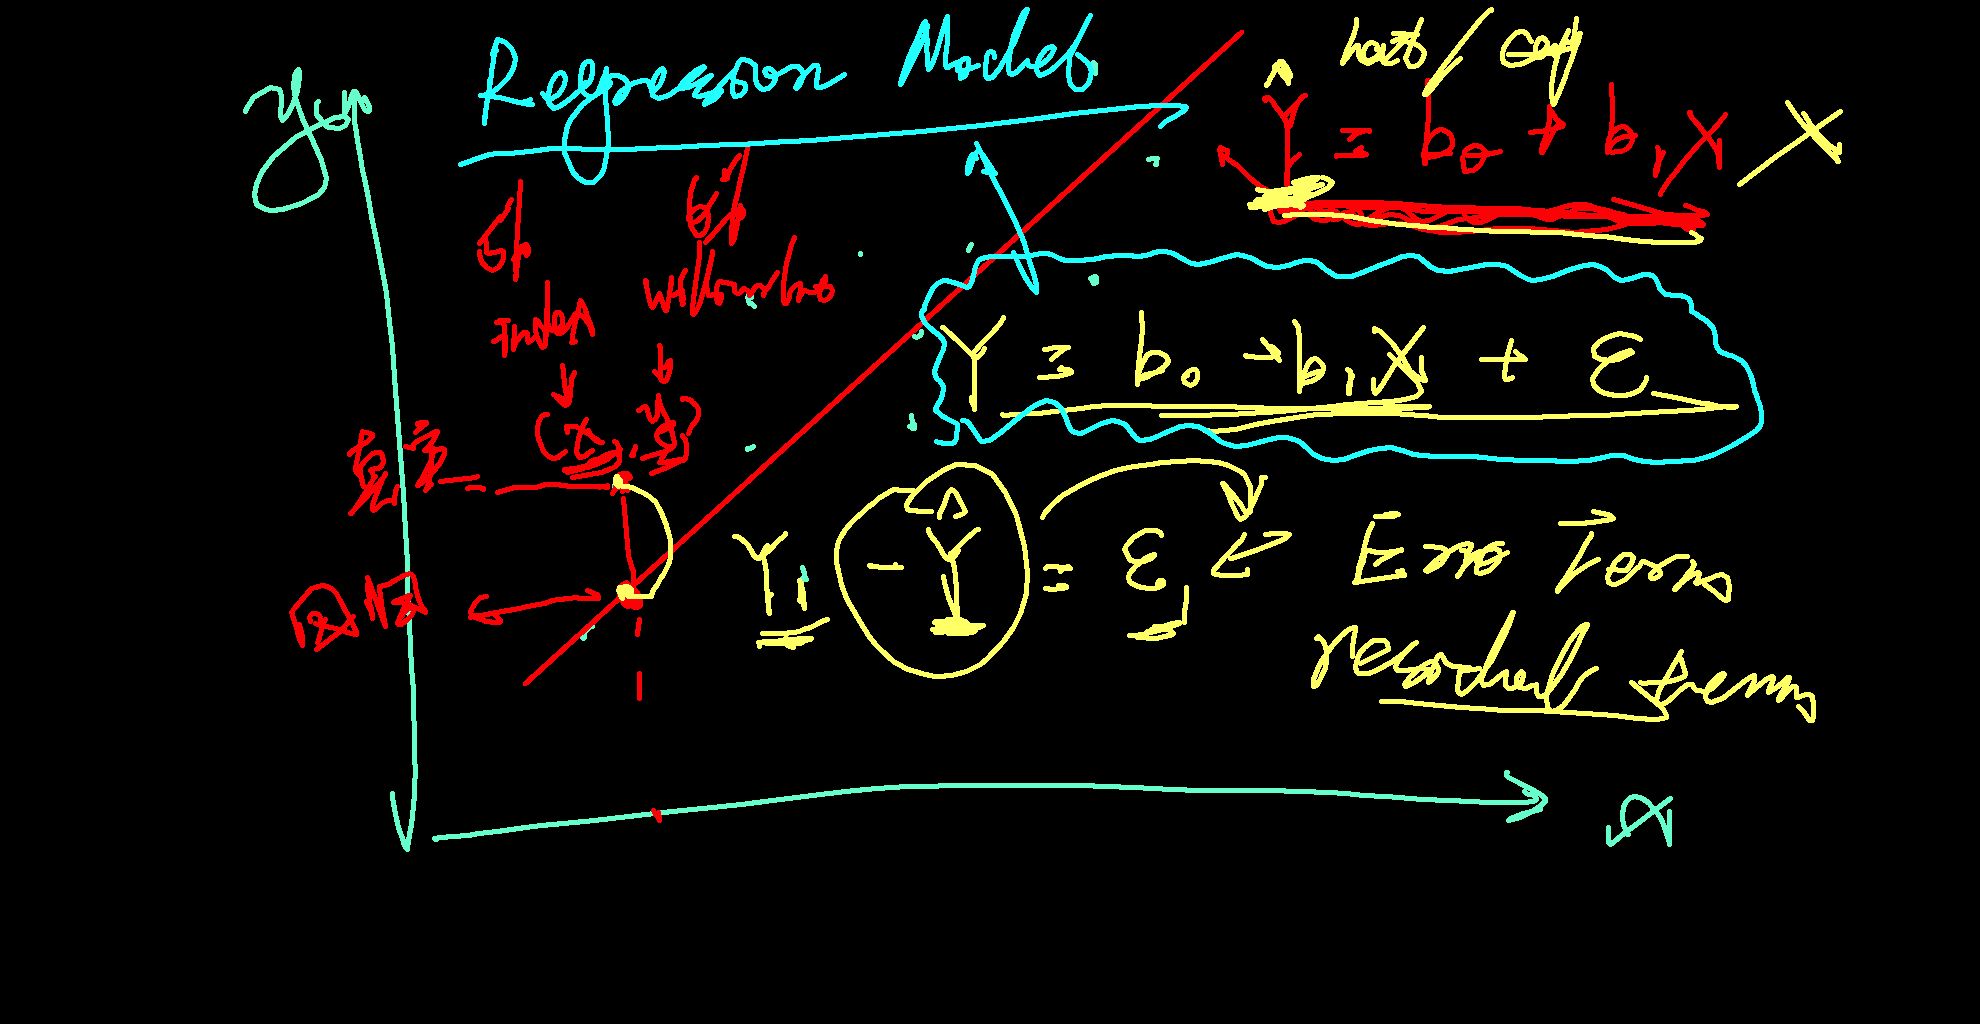

Oridinary Least Square(OLS)

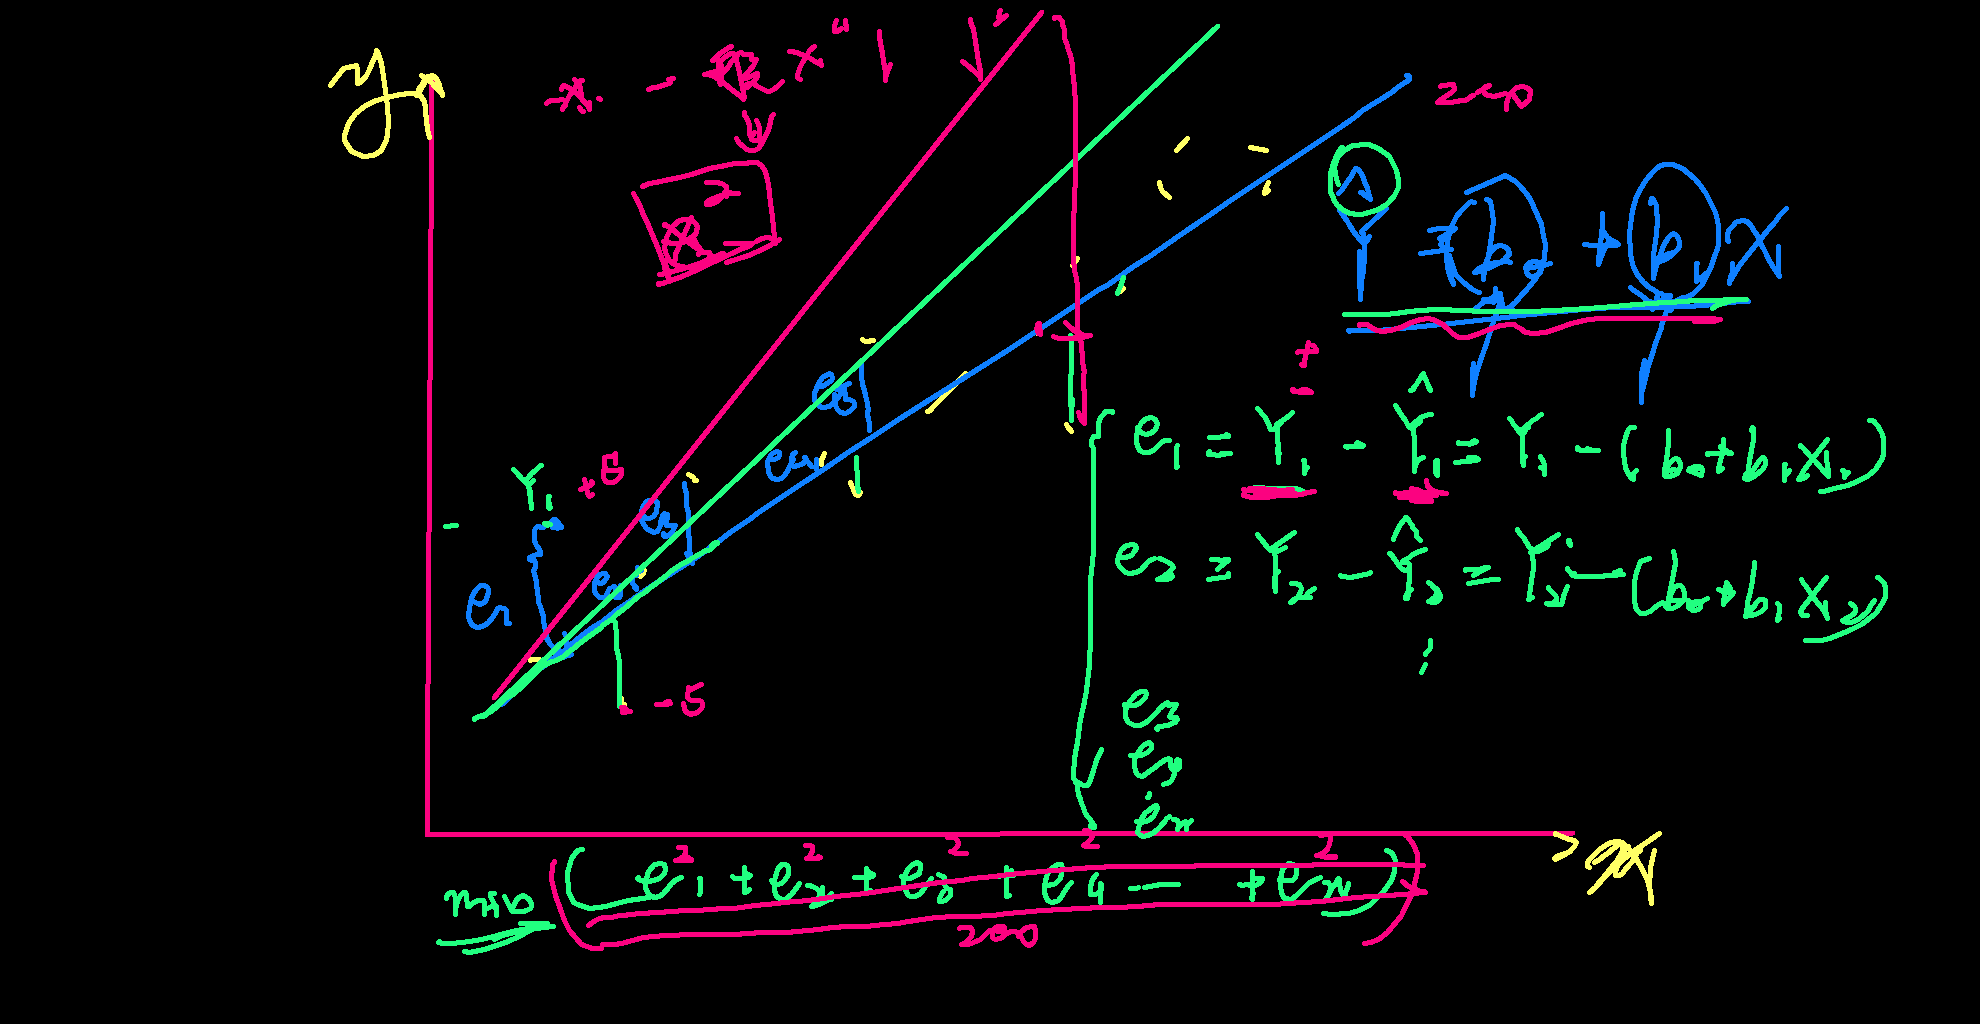

$b1=\frac{Cov(X,Y)}{Variance(X,X)}=\frac{\sum_{i=1}^{n}(X_i-\overline X)(Y_i- \overline Y)}{\sum_{i=1}^{n}(X_i-\overline X)(X_i-\overline X)}$
$b0=\overline Y -b1\overline X$

In [65]:
def calculate_the_coefficients(dataset):
    x=[row[0] for row in dataset]
    y=[row[1] for row in dataset]
    x_mean,y_mean=calculate_mean(x),calculate_mean(y)
    b1=calculate_covariance(x,x_mean,y,y_mean)/calculate_variance(x,x_mean)
    b0=y_mean-b1*x_mean
    
    return [b0,b1]


In [66]:
list_of_tuples

[(1, 5000),
 (2, 7000),
 (3, 8000),
 (4, 10000),
 (5, 15000),
 (6, 18000),
 (7, 19000),
 (8, 20000),
 (9, 16000),
 (10, 30000),
 (2, 12000),
 (2, 6000),
 (3, 8000),
 (3, 5500),
 (3, 9000),
 (2, 7800),
 (4, 9200),
 (5, 14000),
 (5, 16000),
 (2, 8000)]

In [67]:
list_of_lists=[list(elem) for elem in list_of_tuples]
list_of_lists

[[1, 5000],
 [2, 7000],
 [3, 8000],
 [4, 10000],
 [5, 15000],
 [6, 18000],
 [7, 19000],
 [8, 20000],
 [9, 16000],
 [10, 30000],
 [2, 12000],
 [2, 6000],
 [3, 8000],
 [3, 5500],
 [3, 9000],
 [2, 7800],
 [4, 9200],
 [5, 14000],
 [5, 16000],
 [2, 8000]]

In [68]:
b0,b1=calculate_the_coefficients(list_of_lists)
b1


2237.1175523349443

y=2555+2237X

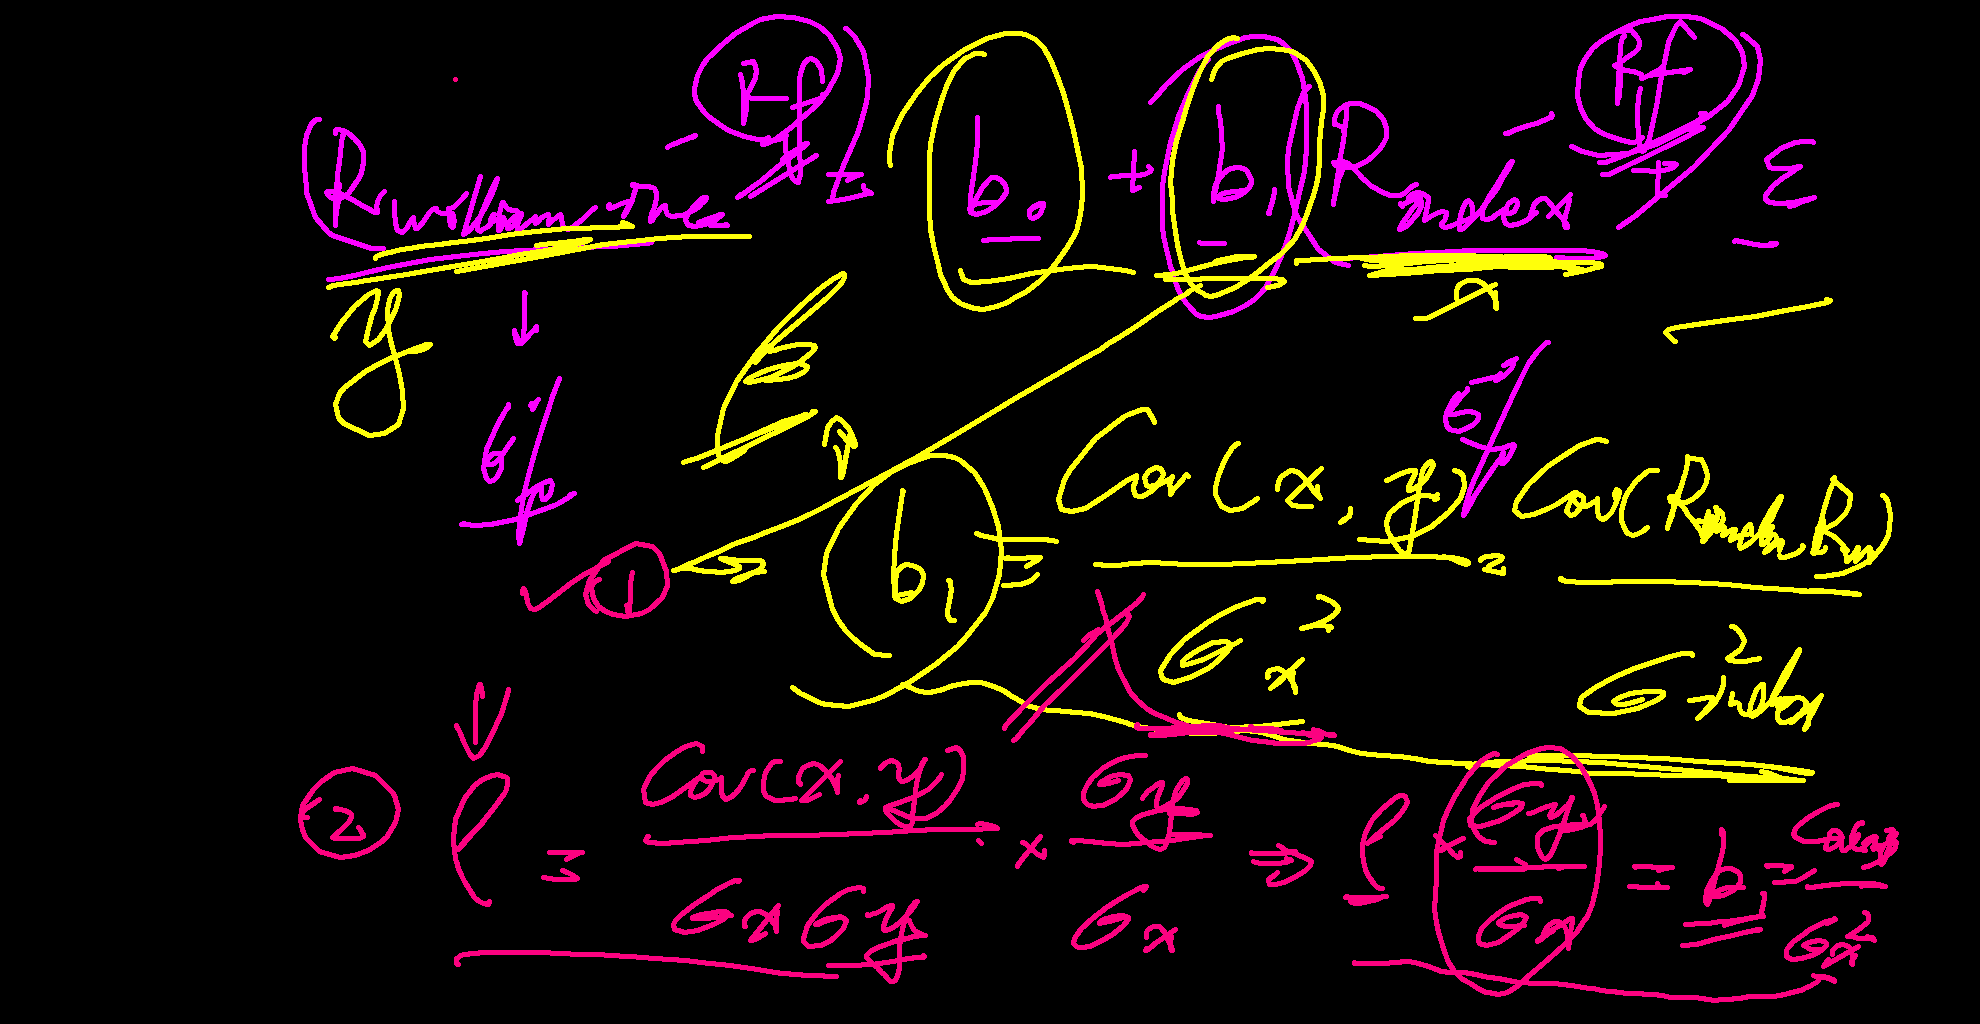

In [69]:
def simple_linear_regression(training_data,testing_data):
    predictions=[]
    b0,b1=calculate_the_coefficients(training_data)
    for row in testing_data:
        y=b0+b1*row[0]
        predictions.append(y)
    return predictions
    
    

In [70]:
from math import sqrt
def calculate_the_RMSE(predicted_data,actual_data):
    the_sum_of_error=0
    for i in range(len(actual_data)):
        prediction_error=predicted_data[i]-actual_data[i]
        the_sum_of_error += (prediction_error**2)
    RMSE=sqrt(the_sum_of_error/float(len(actual_data)))
    return RMSE

In [71]:
data_to_be_put_into_the_model=[]
for row in list_of_lists:
    row_copy=list(row)
    row_copy[-1]=None
    data_to_be_put_into_the_model.append(row_copy)
data_to_be_put_into_the_model

[[1, None],
 [2, None],
 [3, None],
 [4, None],
 [5, None],
 [6, None],
 [7, None],
 [8, None],
 [9, None],
 [10, None],
 [2, None],
 [2, None],
 [3, None],
 [3, None],
 [3, None],
 [2, None],
 [4, None],
 [5, None],
 [5, None],
 [2, None]]

In [72]:
predictions=simple_linear_regression(list_of_lists,data_to_be_put_into_the_model)
predictions

[4792.512077294685,
 7029.629629629629,
 9266.747181964573,
 11503.864734299517,
 13740.982286634462,
 15978.099838969405,
 18215.21739130435,
 20452.334943639296,
 22689.45249597424,
 24926.570048309186,
 7029.629629629629,
 7029.629629629629,
 9266.747181964573,
 9266.747181964573,
 9266.747181964573,
 7029.629629629629,
 11503.864734299517,
 13740.982286634462,
 13740.982286634462,
 7029.629629629629]

In [73]:
actual_data=[row[-1] for row in list_of_lists]
actual_data

[5000,
 7000,
 8000,
 10000,
 15000,
 18000,
 19000,
 20000,
 16000,
 30000,
 12000,
 6000,
 8000,
 5500,
 9000,
 7800,
 9200,
 14000,
 16000,
 8000]

In [76]:
def how_good_is_our_model(dataset,some_model_to_be_evaluated):
    test_data=[]
    for row in dataset:
        row_copy=list(row)
        row_copy[-1]=None
        test_data.append(row_copy)
    predict_data=some_model_to_be_evaluated(dataset,test_data)
    print(predict_data)
    actual_data=[row[-1] for row in dataset]
    print(actual_data)
    RMSE=calculate_the_RMSE(predict_data,actual_data)
    return RMSE
    

In [77]:
result=how_good_is_our_model(list_of_lists,simple_linear_regression)
print(result)

[4792.512077294685, 7029.629629629629, 9266.747181964573, 11503.864734299517, 13740.982286634462, 15978.099838969405, 18215.21739130435, 20452.334943639296, 22689.45249597424, 24926.570048309186, 7029.629629629629, 7029.629629629629, 9266.747181964573, 9266.747181964573, 9266.747181964573, 7029.629629629629, 11503.864734299517, 13740.982286634462, 13740.982286634462, 7029.629629629629]
[5000, 7000, 8000, 10000, 15000, 18000, 19000, 20000, 16000, 30000, 12000, 6000, 8000, 5500, 9000, 7800, 9200, 14000, 16000, 8000]
2593.5919887651553


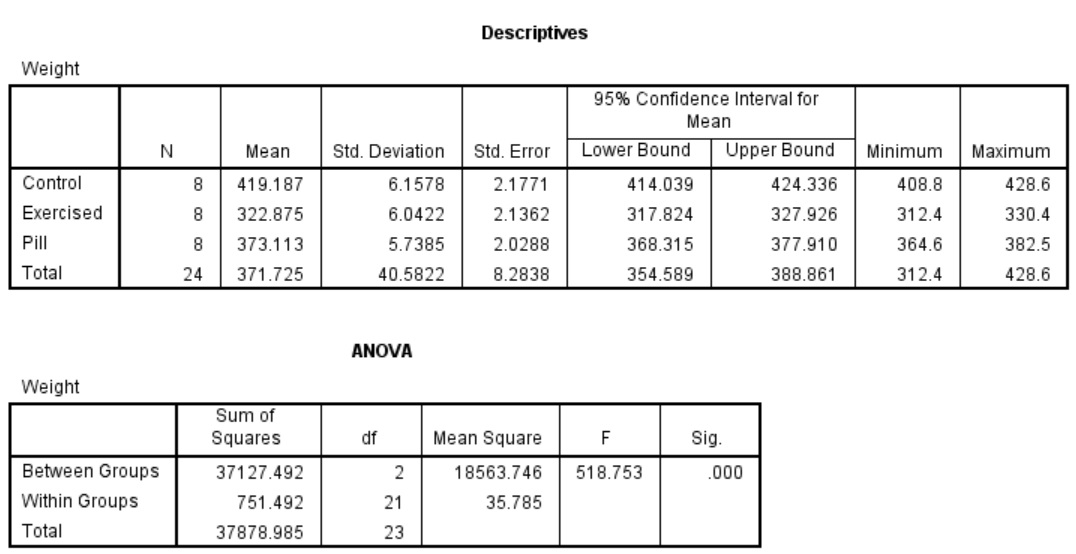

ANOVA(Analysis of Variance) Table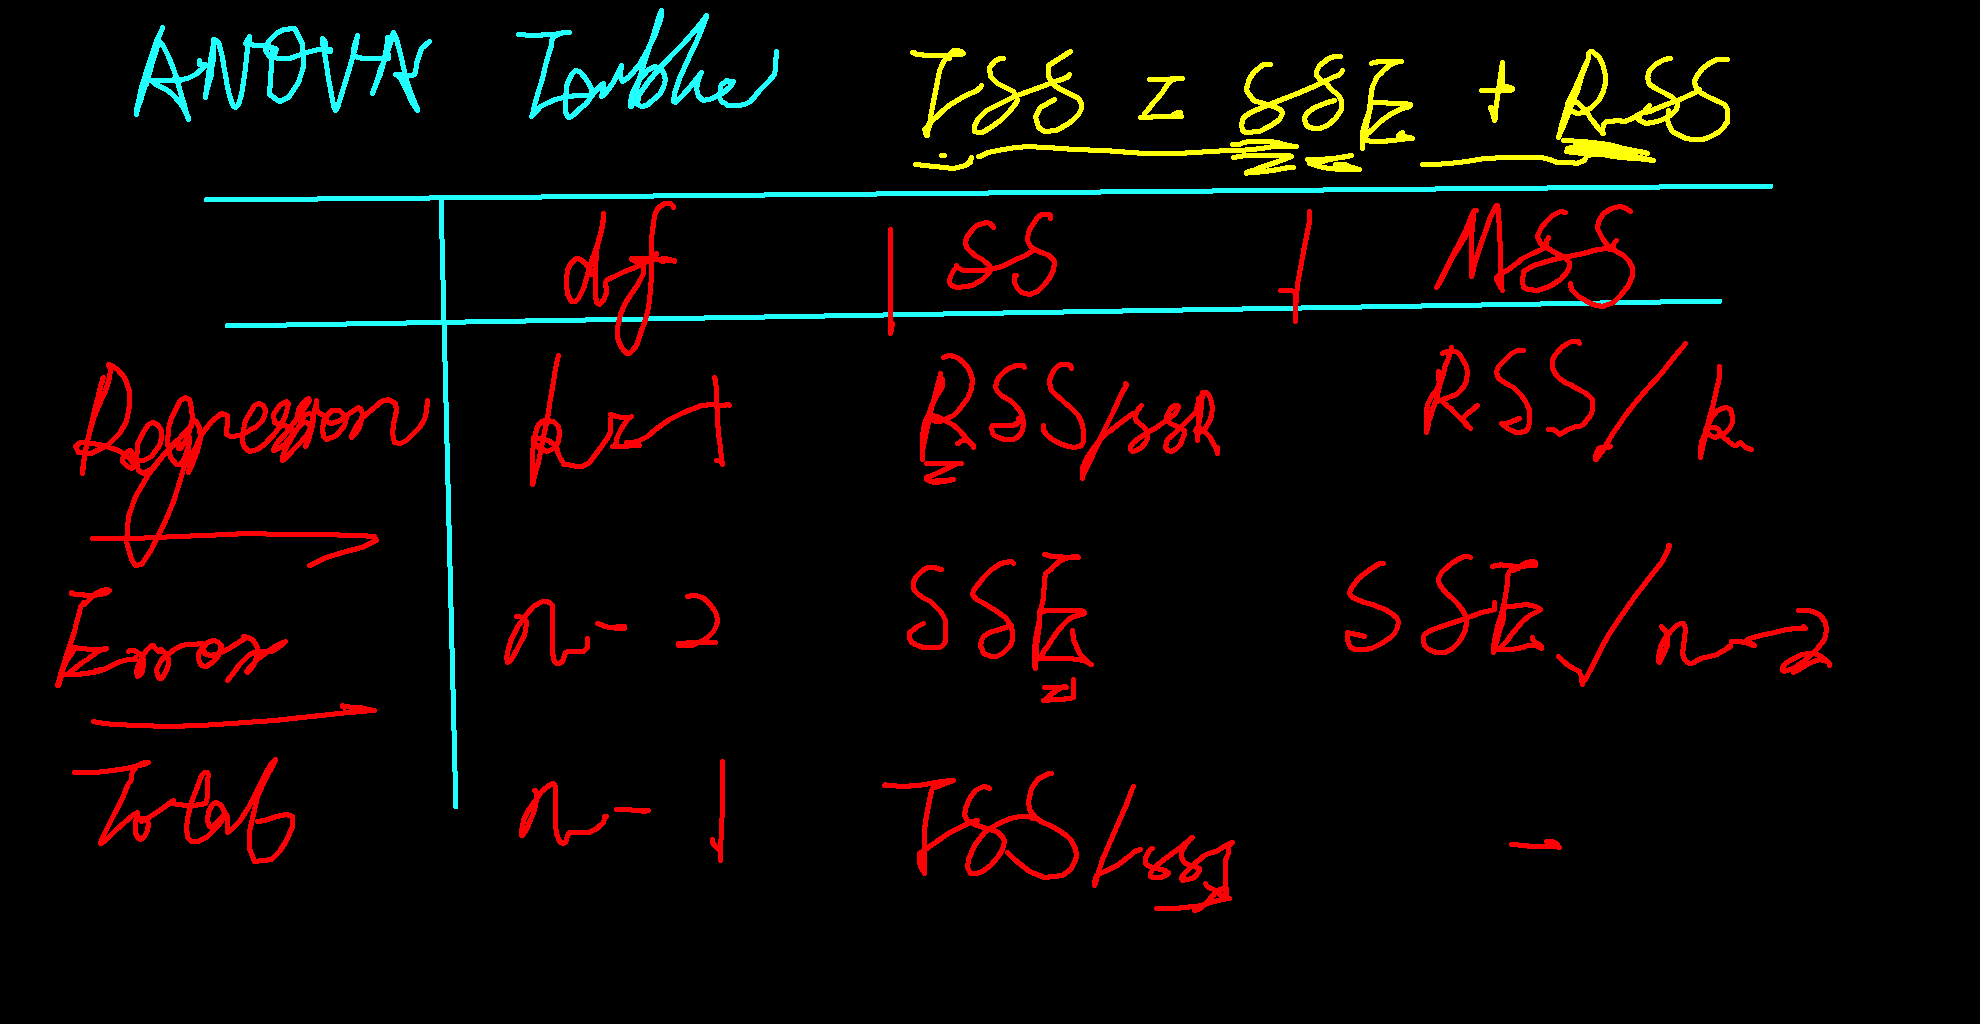

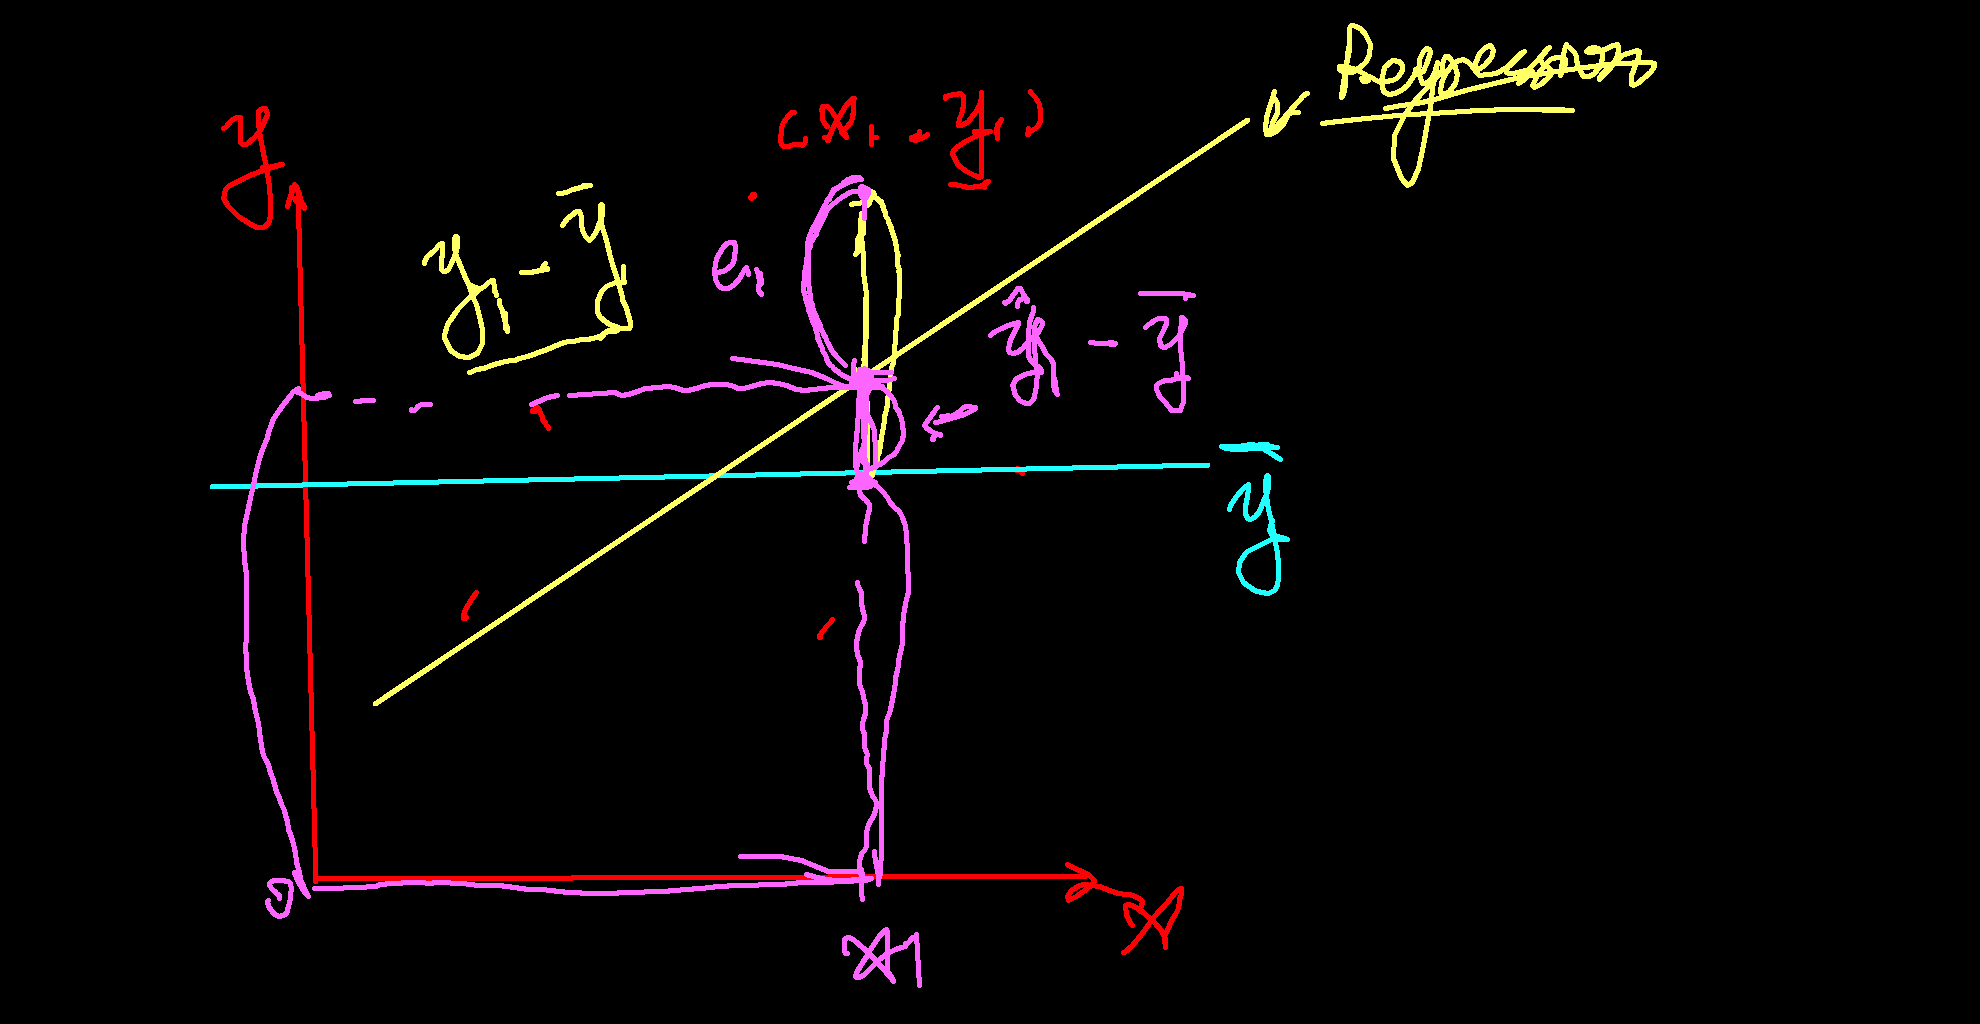

$TSS = (Y_1 - \overline Y)^2 + (Y_2 - \overline Y)^2+ (Y_3 - \overline Y)^2 +.......$<br>
$RSS = (\hat Y_1 - \overline Y)^2 + (\hat Y_2 - \overline Y)^2+ (\hat Y_3 - \overline Y)^2......$<br>
$SSE = (Y_1-\hat Y_1)^2 +(Y_2-\hat Y_2)^2 +(Y_3-\hat Y_3)^2+ ......$

$R^2$ Coefficient of Determination<br>
$R^2 = \frac{SSR(Explained \; Variantion)}{SST(Total \;Variation)}= 1- \frac{ESS(Unexplained \;Variation)}{SST(Total\;Variation)}$